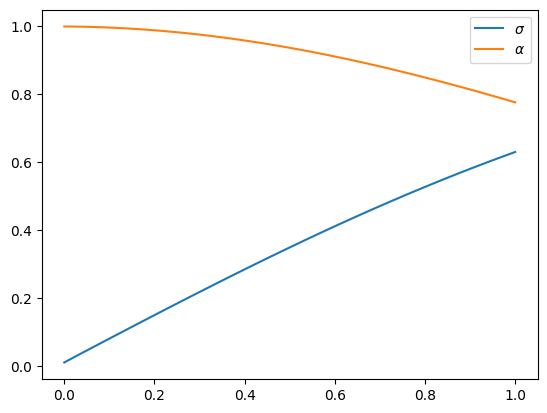

In [34]:
import jax.numpy as jnp
from schedulers import linear_schedule
from diffusion import Config, DDPM
import matplotlib.pyplot as plt

T = 50
config = Config(T=T, scheduler=linear_schedule)
ddpm = DDPM(config=config)
ts = jnp.linspace(0, 1, T)

plt.plot(ts, jnp.sqrt(1. - ddpm.prod_gamma_squared), label=r'$\sigma$')
plt.plot(ts, ddpm.prod_gamma, label=r'$\alpha$')
plt.legend()
plt.show()

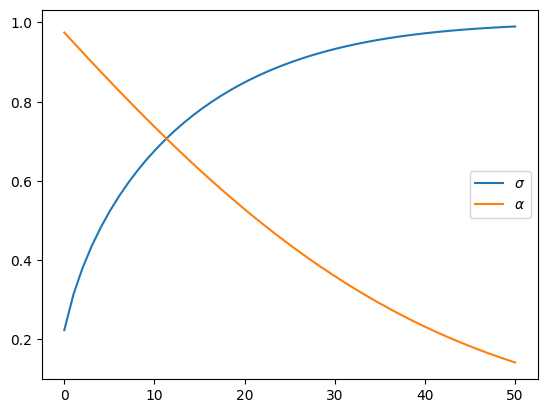

In [35]:
import jax.numpy as jnp
from schedulers import linear_schedule
from diffusion import Config, DDPM
import matplotlib.pyplot as plt

T = 50
config = Config(T=T, scheduler=lambda x : linear_schedule(x, t_min=0.05, t_max=0.1))
ddpm = DDPM(config=config)
ts = jnp.linspace(0, T, T)

plt.plot(ts, jnp.sqrt(1. - ddpm.prod_gamma_squared), label=r'$\sigma$')
plt.plot(ts, ddpm.prod_gamma, label=r'$\alpha$')
plt.legend()
plt.show()

[9.9999997e-10 2.0408163e-02 4.0816326e-02 6.1224490e-02 8.1632651e-02
 1.0204081e-01 1.2244898e-01 1.4285713e-01 1.6326530e-01 1.8367347e-01
 2.0408162e-01 2.2448979e-01 2.4489796e-01 2.6530612e-01 2.8571427e-01
 3.0612245e-01 3.2653061e-01 3.4693876e-01 3.6734694e-01 3.8775510e-01
 4.0816325e-01 4.2857143e-01 4.4897959e-01 4.6938774e-01 4.8979592e-01
 5.1020408e-01 5.3061223e-01 5.5102038e-01 5.7142854e-01 5.9183675e-01
 6.1224490e-01 6.3265306e-01 6.5306121e-01 6.7346936e-01 6.9387752e-01
 7.1428567e-01 7.3469388e-01 7.5510204e-01 7.7551019e-01 7.9591835e-01
 8.1632650e-01 8.3673465e-01 8.5714287e-01 8.7755102e-01 8.9795917e-01
 9.1836733e-01 9.3877548e-01 9.5918363e-01 9.7959185e-01 1.0000000e+00]


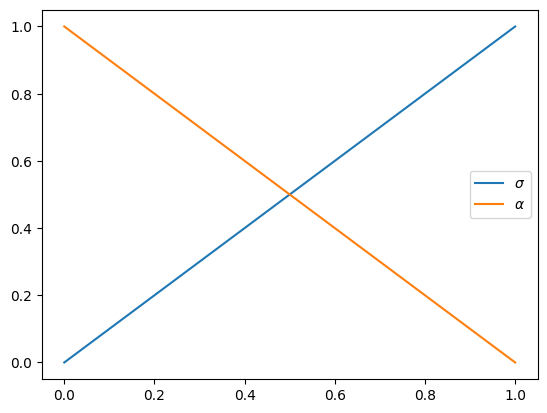

In [37]:
from jax.nn import sigmoid

def simple_linear_schedule(t, clip_min=1e-9):
  # A gamma function that simply is 1-t.
  return jnp.clip(t, clip_min, 1.)

def sigmoid_schedule(t, start=-3, end=3, tau=1.0, clip_min=1e-9):
  # A gamma function based on sigmoid function.
  v_start = sigmoid(start / tau)
  v_end = sigmoid(end / tau)
  output = sigmoid((t * (end - start) + start) / tau)
  output = (v_end - output) / (v_end - v_start)
  return jnp.clip(1.-output, clip_min, 1.)

def cosine_schedule(t, start=0, end=1, tau=1, clip_min=1e-9):
  # A gamma function based on cosine function.
  v_start = jnp.cos(start * jnp.pi / 2) ** (2 * tau)
  v_end = jnp.cos(end * jnp.pi / 2) ** (2 * tau)
  output = jnp.cos((t * (end - start) + start) * jnp.pi / 2) ** (2 * tau)
  output = (v_end - output) / (v_end - v_start)
  return jnp.clip(1. - output, clip_min, 1.)

ts = jnp.linspace(start=0,stop=1, num=T)
print(simple_linear_schedule(ts))
plt.plot(ts, simple_linear_schedule(ts), label=r'$\sigma$')
plt.plot(ts, 1.-simple_linear_schedule(ts), label=r'$\alpha$')
#plt.plot(ts, jnp.log(1.-simple_linear_schedule(ts))-jnp.log(simple_linear_schedule(ts)), label="SNR")
plt.legend()
plt.show()


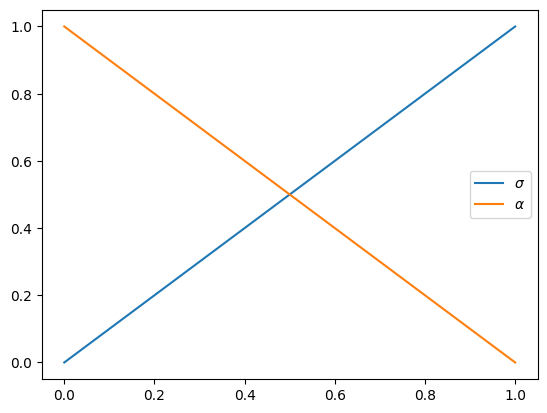

In [39]:
ts = jnp.linspace(start=0,stop=1, num=T)
sigma = jnp.sqrt(simple_linear_schedule(ts))
plt.plot(ts, simple_linear_schedule(ts), label=r'$\sigma$')
plt.plot(ts, 1.-simple_linear_schedule(ts), label=r'$\alpha$')
#plt.plot(ts, jnp.log(1.-simple_linear_schedule(ts))-jnp.log(simple_linear_schedule(ts)), label="SNR")
plt.legend()
plt.show()

[9.9999997e-10 2.0408163e-02 4.0816326e-02 6.1224490e-02 8.1632651e-02
 1.0204081e-01 1.2244898e-01 1.4285713e-01 1.6326530e-01 1.8367347e-01
 2.0408162e-01 2.2448979e-01 2.4489796e-01 2.6530612e-01 2.8571427e-01
 3.0612245e-01 3.2653061e-01 3.4693876e-01 3.6734694e-01 3.8775510e-01
 4.0816325e-01 4.2857143e-01 4.4897959e-01 4.6938774e-01 4.8979592e-01
 5.1020408e-01 5.3061223e-01 5.5102038e-01 5.7142854e-01 5.9183675e-01
 6.1224490e-01 6.3265306e-01 6.5306121e-01 6.7346936e-01 6.9387752e-01
 7.1428567e-01 7.3469388e-01 7.5510204e-01 7.7551019e-01 7.9591835e-01
 8.1632650e-01 8.3673465e-01 8.5714287e-01 8.7755102e-01 8.9795917e-01
 9.1836733e-01 9.3877548e-01 9.5918363e-01 9.7959185e-01 1.0000000e+00]


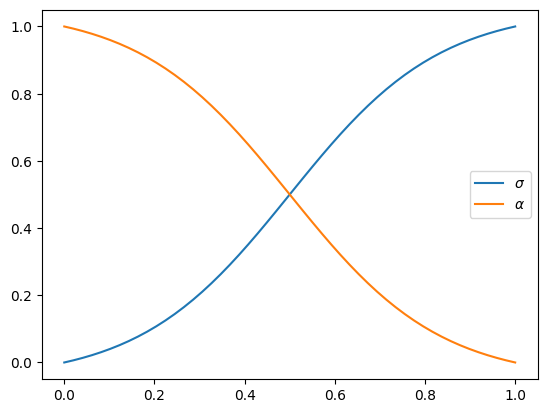

In [40]:
print(simple_linear_schedule(ts))
plt.plot(ts, sigmoid_schedule(ts), label=r'$\sigma$')
plt.plot(ts, 1.-sigmoid_schedule(ts), label=r'$\alpha$')
#plt.plot(ts, jnp.log(1.-simple_linear_schedule(ts))-jnp.log(simple_linear_schedule(ts)), label="SNR")
plt.legend()
plt.show()


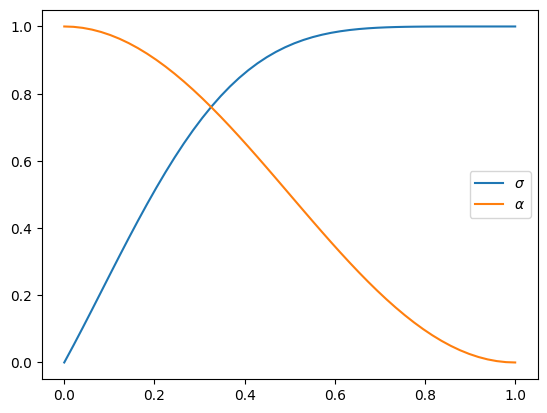

In [42]:
ts = jnp.linspace(start=0,stop=1, num=T)
plt.plot(ts, cosine_schedule(ts, start=0.2, end=1., tau=3.), label=r'$\sigma$')
plt.plot(ts, 1.-cosine_schedule(ts), label=r'$\alpha$')
#plt.plot(ts, jnp.log(1.-simple_linear_schedule(ts))-jnp.log(simple_linear_schedule(ts)), label="SNR")
plt.legend()
plt.show()
